In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [11]:
# Declare the input and output variables
demanda = ctrl.Antecedent(np.arange(5, 51, 1), 'demanda')
tiempo_reabastecimiento = ctrl.Antecedent(np.arange(8, 73, 1), 'tiempo_reabastecimiento')
stock = ctrl.Antecedent(np.arange(70, 201, 1), 'stock')

materia_prima = ctrl.Consequent(np.arange(300, 901, 1), 'materia_prima')

## **Antecedentes**

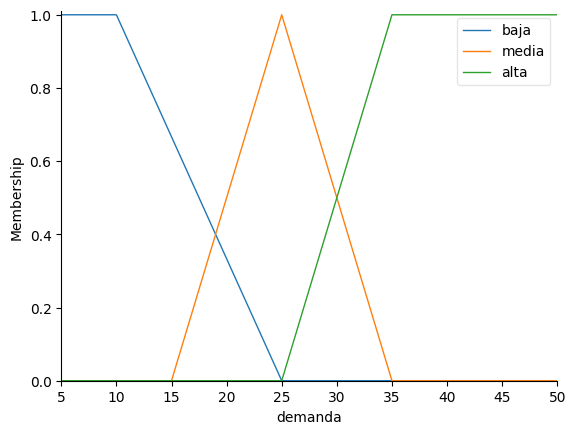

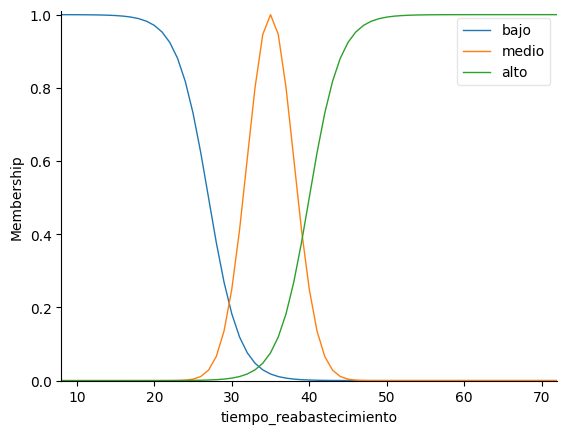

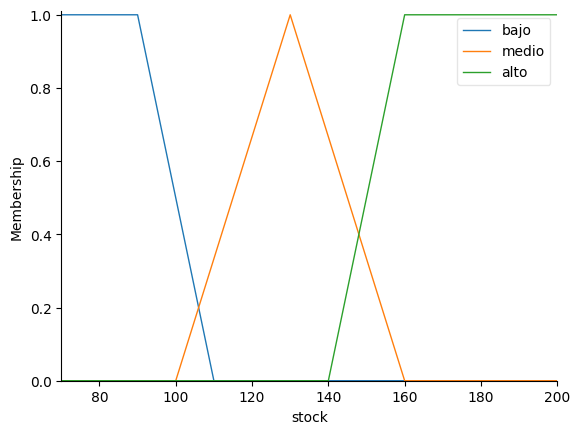

In [12]:
# Demanda
demanda['baja'] = fuzz.trapmf(demanda.universe, [5, 5, 10, 25])
demanda['media'] = fuzz.trimf(demanda.universe, [15, 25, 35])
demanda['alta'] = fuzz.trapmf(demanda.universe, [25, 35, 50, 50])
demanda.view()


# tiempo de Reabastecimiento
tiempo_reabastecimiento['bajo'] = fuzz.sigmf(tiempo_reabastecimiento.universe, 27, -0.5)
tiempo_reabastecimiento['medio'] = fuzz.gaussmf(tiempo_reabastecimiento.universe, 35, 3)
tiempo_reabastecimiento['alto'] = fuzz.sigmf(tiempo_reabastecimiento.universe, 40, 0.5)
tiempo_reabastecimiento.view()


# Stock
stock['bajo'] = fuzz.trapmf(stock.universe, [70, 70, 90, 110])
stock['medio'] = fuzz.trimf(stock.universe, [100, 130, 160])
stock['alto'] = fuzz.trapmf(stock.universe, [140, 160, 200, 200])
stock.view()


## **Consecuentes (materia prima)**

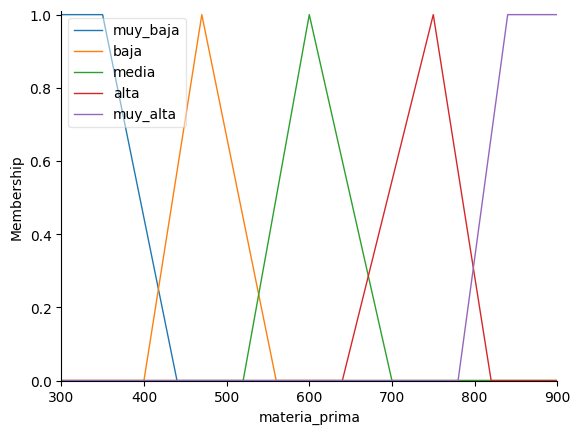

In [13]:
materia_prima['muy_baja'] = fuzz.trapmf(materia_prima.universe, [300, 300, 350, 440])
materia_prima['baja'] = fuzz.trimf(materia_prima.universe, [400, 470, 560])
materia_prima['media'] = fuzz.trimf(materia_prima.universe, [520, 600, 700])
materia_prima['alta'] = fuzz.trimf(materia_prima.universe, [640, 750, 820])
materia_prima['muy_alta'] = fuzz.trapmf(materia_prima.universe, [780, 840, 900, 900])

materia_prima.view()
plt.show()

## **Reglas de inferencia**

In [14]:
regla1 = ctrl.Rule((demanda['baja'] | stock['bajo']) & tiempo_reabastecimiento['bajo'], materia_prima['muy_baja'])
regla2 = ctrl.Rule((demanda['baja'] | stock['bajo']) & tiempo_reabastecimiento['medio'], materia_prima['muy_baja'])
regla3 = ctrl.Rule((demanda['baja'] | stock['bajo']) & tiempo_reabastecimiento['alto'], materia_prima['baja'])
regla4 = ctrl.Rule((demanda['baja'] | stock['medio']) & tiempo_reabastecimiento['bajo'], materia_prima['muy_baja'])
regla5 = ctrl.Rule((demanda['baja'] | stock['medio']) & tiempo_reabastecimiento['medio'], materia_prima['baja'])
regla6 = ctrl.Rule((demanda['baja'] | stock['medio']) & tiempo_reabastecimiento['alto'], materia_prima['media'])
regla7 = ctrl.Rule((demanda['baja'] | stock['alto']) & tiempo_reabastecimiento['bajo'], materia_prima['baja'])
regla8 = ctrl.Rule((demanda['baja'] | stock['alto']) & tiempo_reabastecimiento['medio'], materia_prima['media'])
regla9 = ctrl.Rule((demanda['baja'] | stock['alto']) & tiempo_reabastecimiento['alto'], materia_prima['alta'])
regla10 = ctrl.Rule((demanda['media'] | stock['bajo']) & tiempo_reabastecimiento['bajo'], materia_prima['muy_baja'])
regla11 = ctrl.Rule((demanda['media'] | stock['bajo']) & tiempo_reabastecimiento['medio'], materia_prima['baja'])
regla12 = ctrl.Rule((demanda['media'] | stock['bajo']) & tiempo_reabastecimiento['alto'], materia_prima['media'])
regla13 = ctrl.Rule((demanda['media'] | stock['medio']) & tiempo_reabastecimiento['bajo'], materia_prima['baja'])
regla14 = ctrl.Rule((demanda['media'] | stock['medio']) & tiempo_reabastecimiento['medio'], materia_prima['media'])
regla15 = ctrl.Rule((demanda['media'] | stock['medio']) & tiempo_reabastecimiento['alto'], materia_prima['alta'])
regla16 = ctrl.Rule((demanda['media'] | stock['alto']) & tiempo_reabastecimiento['bajo'], materia_prima['media'])
regla17 = ctrl.Rule((demanda['media'] | stock['alto']) & tiempo_reabastecimiento['medio'], materia_prima['media'])
regla18 = ctrl.Rule((demanda['media'] | stock['alto']) & tiempo_reabastecimiento['alto'], materia_prima['muy_alta'])
regla19 = ctrl.Rule((demanda['alta'] | stock['bajo']) & tiempo_reabastecimiento['bajo'], materia_prima['media'])
regla20 = ctrl.Rule((demanda['alta'] | stock['bajo']) & tiempo_reabastecimiento['medio'], materia_prima['alta'])
regla21 = ctrl.Rule((demanda['alta'] | stock['bajo']) & tiempo_reabastecimiento['alto'], materia_prima['muy_alta'])
regla22 = ctrl.Rule((demanda['alta'] | stock['medio']) & tiempo_reabastecimiento['bajo'], materia_prima['media'])
regla23 = ctrl.Rule((demanda['alta'] | stock['medio']) & tiempo_reabastecimiento['medio'], materia_prima['alta'])
regla24 = ctrl.Rule((demanda['alta'] | stock['medio']) & tiempo_reabastecimiento['alto'], materia_prima['muy_alta'])
regla25 = ctrl.Rule((demanda['alta'] | stock['alto']) & tiempo_reabastecimiento['bajo'], materia_prima['media'])
regla26 = ctrl.Rule((demanda['alta'] | stock['alto']) & tiempo_reabastecimiento['medio'], materia_prima['alta'])
regla27 = ctrl.Rule((demanda['alta'] | stock['alto']) & tiempo_reabastecimiento['alto'], materia_prima['muy_alta'])

In [15]:
# Control de inferencia
materia_ctrl = ctrl.ControlSystem([regla1, regla2, regla3, regla4, regla5, regla6, regla7, regla8, regla9, regla10, regla11, regla12, regla13, regla14, regla15, regla16, regla17, regla18, regla19, regla20, regla21, regla22, regla23, regla24, regla25, regla26, regla27])

505.5277828996364


np.float64(20.363757833246762)

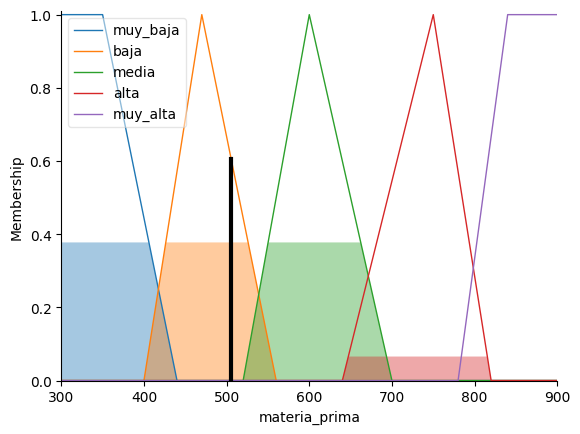

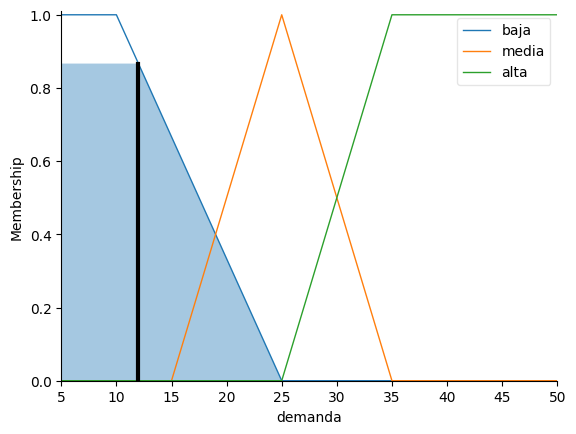

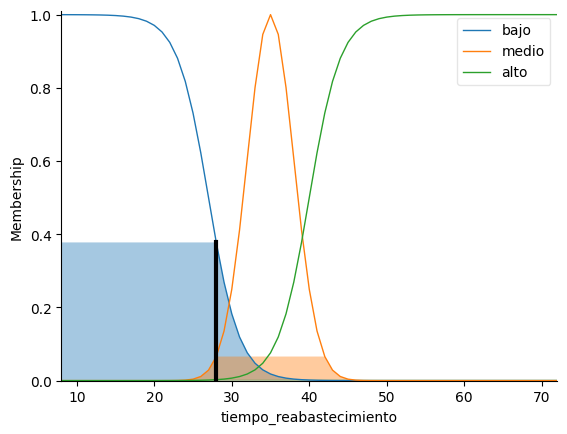

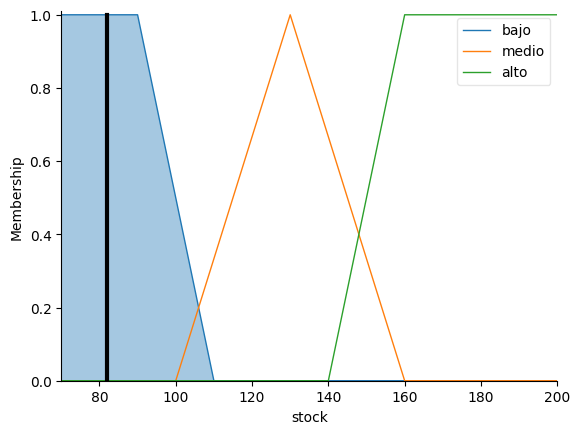

In [16]:
materia = ctrl.ControlSystemSimulation(materia_ctrl)
materia.input['demanda'] = 12
materia.input['tiempo_reabastecimiento'] = 28
materia.input['stock'] = 82

materia.compute()
print(materia.output['materia_prima'])
materia_prima.view(sim=materia)
demanda.view(sim=materia)
tiempo_reabastecimiento.view(sim=materia)
stock.view(sim=materia)

#Error absoluto medio
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

y_true = 420
y_pred = materia.output['materia_prima']
mape(y_true, y_pred)